In [4]:
colnames = ['topic', 'word', 'weight']

In [5]:
topics_df_30 = pd.read_csv('postprocessed_topics_30_full.txt', sep='\t', names=colnames)

In [6]:
topics_df_30_dict = {row[0]: {} for row in topics_df_30.values}

In [7]:
topics_df_30[topics_df_30.topic == 0]

,topic,word,weight
0,0,aimer,0.01
1,0,croire,0.01
2,0,armer,0.01
3,0,vue,0.01
4,0,prendre,0.01
...,...,...,...
4860,0,emmener,0.01
4861,0,ongle,0.01
4862,0,griffe,0.01
4863,0,augurer,0.01


In [120]:
for topic in topics_df_30_dict:
    topics_df_30_dict[topic] = {row[1]: row[2] for row in topics_df_30[topics_df_30.topic == topic].values if row[2] > 0.01}

In [118]:
from tqdm import tqdm
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [125]:
for key in tqdm(topics_df_30_dict):
    wc = WordCloud(background_color='white', width = 1024, height=1024, colormap='tab20b')
    wc.fit_words(topics_df_30_dict[key])
    wc.to_file(f'wordclouds/30_{key}.png')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:30<00:00,  5.03s/it]


__Topics are available in the wordclouds folder.__

In [122]:
wc = WordCloud(background_color='white', width = 1024, height=1024, colormap='tab20b')

In [123]:
wc.fit_words(topics_df_30_dict[0])

In [121]:
topics_df_30_dict[0]

{'amant': 20.01,
 'vanter': 5.01,
 'grand': 68.01,
 'sacré': 1.01,
 'roi': 61.01,
 'assassin': 22.01,
 'reine': 40.01,
 'fille': 18.01,
 'mourir': 112.01,
 'rencontrer': 5.01,
 'proche': 7.01,
 'montrer': 1.01,
 'ciel': 91.01,
 'sacrifice': 19.01,
 'faire': 59.01,
 'public': 1.01,
 'comble': 3.01,
 'spectacle': 1.01,
 'vivre': 57.01,
 'trépas': 44.01,
 'mort': 56.01,
 'dieu': 84.01,
 'malheur': 31.01,
 'sauver': 31.01,
 'gloire': 1.01,
 'distinguer': 4.01,
 'innocent': 27.01,
 'second': 16.01,
 'œil': 33.01,
 'fin': 12.01,
 'victime': 11.01,
 'assurément': 1.01,
 'zèle': 3.01,
 'aussitôt': 3.01,
 'fard': 7.01,
 'effacer': 10.01,
 'remplir': 1.01,
 'héros': 1.01,
 'ouvrir': 9.01,
 'déposer': 2.01,
 'lustre': 7.01,
 'épandre': 2.01,
 'sépulture': 3.01,
 'près': 7.01,
 'commencer': 1.01,
 'mère': 1.01,
 'sort': 37.01,
 'hier': 2.01,
 'sœur': 12.01,
 'visage': 39.01,
 'pâlir': 1.01,
 'revoir': 9.01,
 'élever': 5.01,
 'ombre': 31.01,
 'combattant': 3.01,
 'renfermer': 2.01,
 'avouer': 15.01

In [46]:
topics_df_30_topic_0 = topics_df_30[topics_df_30['topic'] == 0][['weight100', 'word', 'color', 'url']]

In [48]:
topics_df_30_topic_0[topics_df_30_topic_0['weight100'] > 1].to_csv('postprocessed_topics_30_full_0.csv', header=False, index=False)

# Topic distribution

In [18]:
df_topics = pd.read_csv('output-doc-topics.txt', sep='\t', names=['id', 'filename', *[f'topic_{i}' for i in range(30)]])

In [19]:
df_topics['genre'] = df_topics.filename.apply(lambda x: x.split('/')[-2])

In [22]:
df_topics.head()

,id,filename,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,genre
0,0,file:/Users/fixed/Downloads/Mallet-202108/post...,0.001587,0.001587,0.106349,0.001587,0.030159,0.058730,0.001587,0.011111,...,0.001587,0.058730,0.001587,0.020635,0.020635,0.068254,0.001587,0.020635,0.011111,tragedy
1,1,file:/Users/fixed/Downloads/Mallet-202108/post...,0.006141,0.000143,0.120965,0.086690,0.043845,0.041274,0.000143,0.000143,...,0.001857,0.006998,0.027564,0.015567,0.207512,0.000143,0.042988,0.001000,0.000143,tragedy
2,2,file:/Users/fixed/Downloads/Mallet-202108/post...,0.002344,0.000123,0.162226,0.000864,0.147422,0.016408,0.000864,0.000123,...,0.014187,0.012707,0.006785,0.000123,0.144461,0.000123,0.000123,0.000123,0.059339,tragedy
3,3,file:/Users/fixed/Downloads/Mallet-202108/post...,0.000201,0.000201,0.148752,0.000201,0.042472,0.054549,0.000201,0.000201,...,0.013486,0.000201,0.014694,0.000201,0.145129,0.008655,0.001409,0.017110,0.000201,tragedy
4,4,file:/Users/fixed/Downloads/Mallet-202108/post...,0.000275,0.000275,0.148545,0.000275,0.000275,0.072762,0.000275,0.013454,...,0.038166,0.038166,0.000275,0.000275,0.211148,0.015102,0.000275,0.003569,0.000275,tragedy


In [23]:
df_plays = pd.read_csv('../plays_data.tsv', sep='\t')

In [41]:
comedy_topic_dist = df_topics.groupby('genre').mean().values[0][1:]

In [42]:
tragedy_topic_dist = df_topics.groupby('genre').mean().values[1][1:]

In [43]:
tragedy4_topic_dist = df_topics.groupby('genre').mean().values[2][1:]

In [51]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

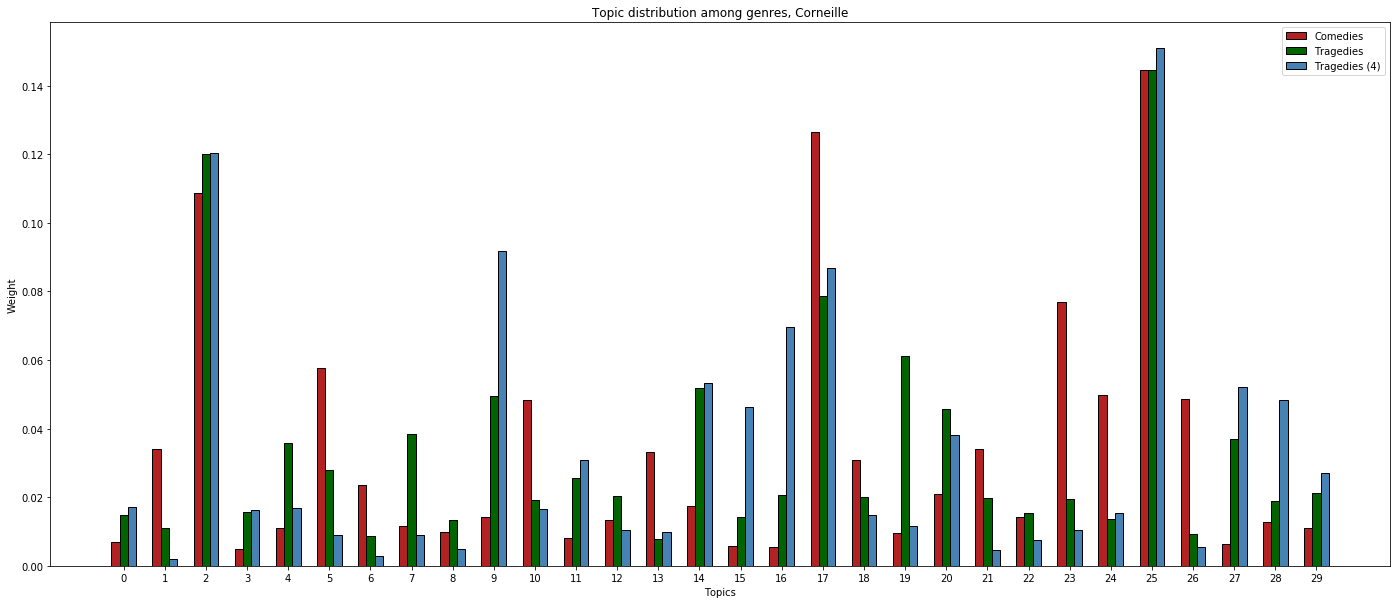

In [95]:
figure(figsize=(24,10))

X_axis = np.arange(len(comedy_topic_dist))
  
plt.bar(X_axis - 0.2, comedy_topic_dist, 0.2, label = 'Comedies', color='firebrick', edgecolor='black')
plt.bar(X_axis, tragedy_topic_dist, 0.2, label = 'Tragedies', color='darkgreen', edgecolor='black')
plt.bar(X_axis + 0.2, tragedy4_topic_dist, 0.2, label = 'Tragedies (4)', color='steelblue', edgecolor='black')

plt.xticks(X_axis, list(range(30)))
plt.xlabel("Topics")
plt.ylabel("Weight")
plt.title("Topic distribution among genres, Corneille")
plt.legend()
plt.show()

In [66]:
tragedy_mean_topic_dist = (tragedy_topic_dist + tragedy4_topic_dist) / 2

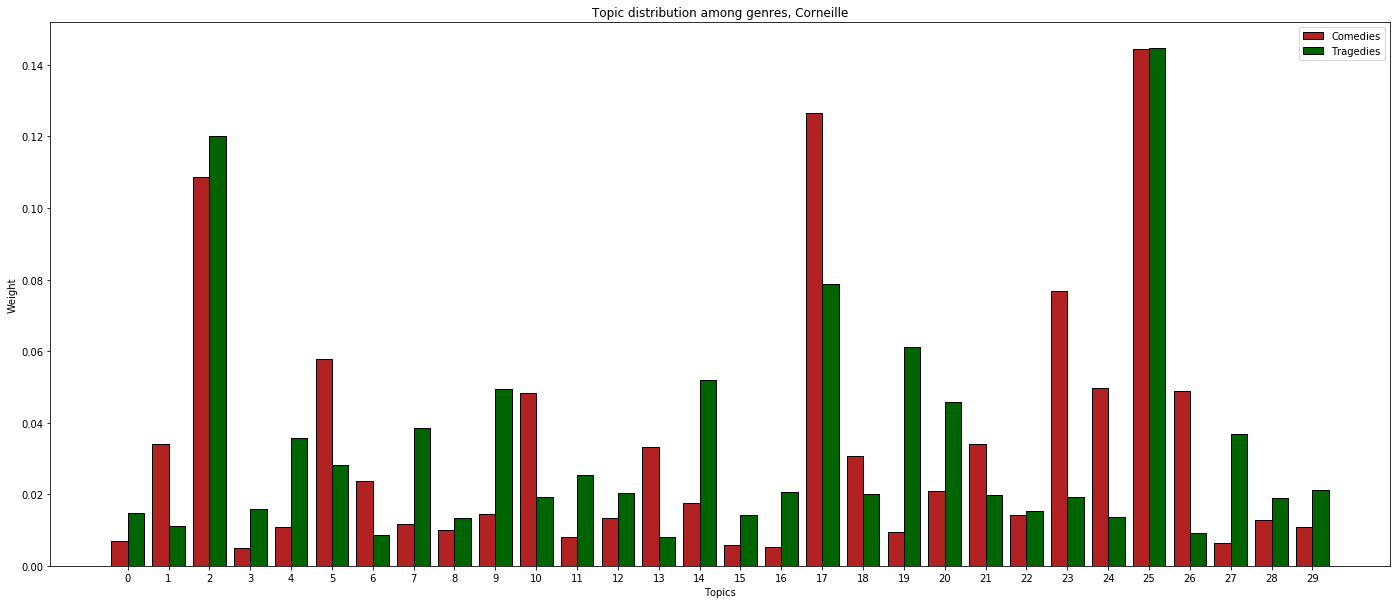

In [85]:
figure(figsize=(24,10))

X_axis = np.arange(len(comedy_topic_dist))
  
plt.bar(X_axis - 0.2, comedy_topic_dist, 0.4, label = 'Comedies', color='firebrick', edgecolor='black')
plt.bar(X_axis + 0.2, tragedy_topic_dist, 0.4, label = 'Tragedies', color='darkgreen', edgecolor='black')

plt.xticks(X_axis, list(range(30)))
plt.xlabel("Topics")
plt.ylabel("Weight")
plt.title("Topic distribution among genres, Corneille")
plt.legend()
plt.show()

In [81]:
np.argsort(comedy_topic_dist / tragedy_topic_dist)[:4]

array([19, 27, 16,  9])

In [109]:
np.argsort(comedy_topic_dist / tragedy_topic_dist)[-4:][::-1]

array([26, 13, 23, 24])

In [130]:
(tragedy_topic_dist / comedy_topic_dist)[0]

2.0782428848981516

In [126]:
(comedy_topic_dist / tragedy_topic_dist)[23]

3.972391766627021

In [108]:
(comedy_topic_dist / tragedy_topic_dist)[23]

3.972391766627021